In this notebook I'm trying to discover whether some cities have unique properies. I'm using external geo data

In [3]:
import os
import sys
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import reverse_geocoder as rg


In [69]:
data = pd.read_csv(os.path.join('..', 'data', 'raw', 'ubaar-competition', 'train.csv'), encoding="utf-8", index_col="ID")

In [81]:
coords = data[['sourceLatitude', 'sourceLongitude']]
localisations = rg.search([tuple(row) for row in coords.values])

data['source_city'] = [l['name'] for l in localisations]
data['source_province'] = [l['admin1'] for l in localisations]

In [82]:
coords = data[['destinationLatitude', 'destinationLongitude']]
localisations = rg.search([tuple(row) for row in coords.values])

data['destination_city'] = [l['name'] for l in localisations]
data['destination_province'] = [l['admin1'] for l in localisations]

<AxesSubplot:title={'center':'Number of transactions in cities'}, ylabel='#'>

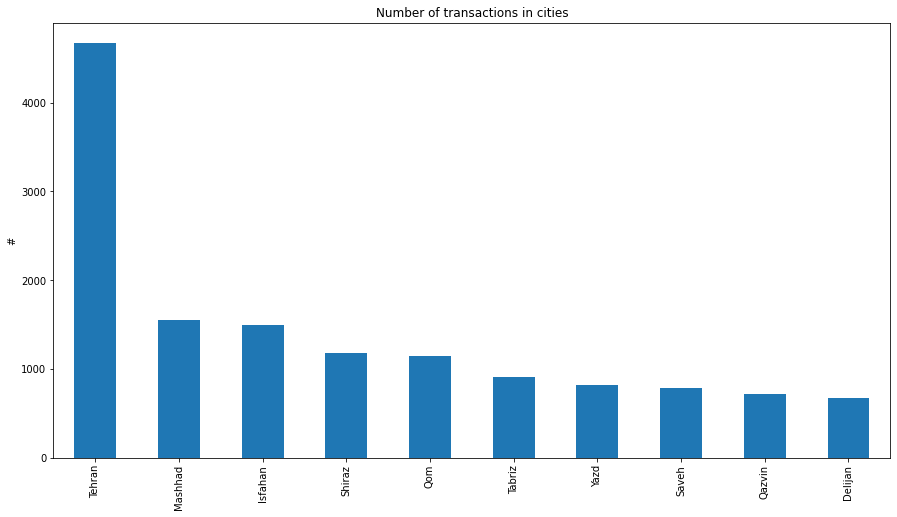

In [121]:
plt.figure(figsize=(15,8))
data['source_city'].value_counts()[:10].plot(kind='bar',title='Number of transactions in cities', ylabel='#')

<AxesSubplot:title={'center':'Absolute cumulative prices'}, xlabel='source_city', ylabel='sum of all cities price'>

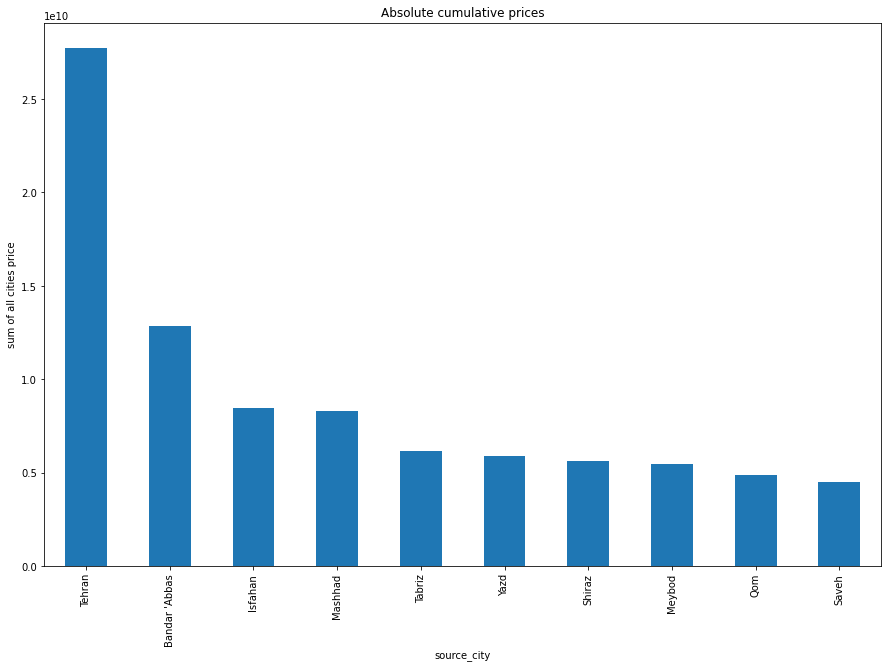

In [119]:
plt.figure(figsize=(15,10))
data.groupby('source_city')['price'].sum().sort_values(ascending=False)[:10].plot(kind='bar', title='Absolute cumulative prices', ylabel='sum of all cities price')

<AxesSubplot:title={'center':'Absolute cumulative prices'}, xlabel='source_city', ylabel='sum of all cities price'>

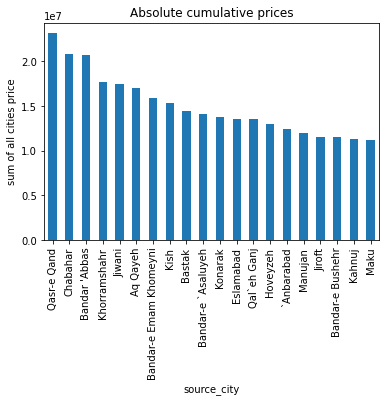

In [118]:

data.groupby('source_city')['price'].mean().sort_values(ascending=False)[:20].plot(kind='bar', title='Absolute cumulative prices', ylabel='sum of all cities price')

Cities have unique properties - different number of transports, different prices. More can be seen in `data/processed/ave_prices.html`